# <center>  AI - CA4  </center>
# <center> Movie type prediction  </center>
# <center>   Ali Khoshtinat - 810196462 </center>
    
    


# Abstract
In this project, we want to predict movie type using machine learning algorithms. Fist of all, we need to know the dataset. And then we need to preprocess the data and then predict movie type.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [2]:
dataset = pd.read_csv('dataset.csv')

# Phase 0

### Dataset

In the following section, you can see the dataset.

In [3]:
dataset

,type,title,cast,country,release_year,listed_in,description
0,Movie,Dick Johnson Is Dead,NaN,United States,2020,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,NaN,NaN,2021,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...
11054,TV Show,X-Men: Evolution,"Noel Fisher, Vincent Gale, Christopher Judge, ...",United States,2000,"Action-Adventure, Animation, Kids",X-Men: Evolution features the team as teenager...
11055,TV Show,Smart Guy,"Tahj Mowry, John Jones, Jason Weaver, Essence ...",United States,1996,"Comedy, Coming of Age, Kids",A genius tries to fit in as a high school soph...
11056,TV Show,Disney Kirby Buckets,"Jacob Bertrand, Mekai Curtis, Cade Sutton, Oli...",United States,2014,"Action-Adventure, Comedy, Coming of Age",Welcome to Kirby's world! It's rude and sketchy.
11057,TV Show,Disney Mech-X4,"Nathaniel Potvin, Raymond Cham, Kamran Lucas, ...",Canada,2016,"Action-Adventure, Comedy, Science Fiction",Ryan discovers his ability to control a giant ...


We want to see all possible values for type column and release_year column.
As you can see, there are two possible values in type column (Movie & Tv Show).

In [4]:
print('type column values:', dataset['type'].unique())
print('release_year column values:', dataset['release_year'].unique())

type column values: ['Movie' 'TV Show']
release_year column values: [2020 2021 1993 2018 1996 1998 1997 2010 2013 2017 1975 1978 1983 1987
 2012 2001 2014 2002 2003 2004 2011 2008 2009 2007 2005 2006 1994 2015
 2019 2016 1982 1989 1990 1991 1999 1986 1992 1984 1980 1961 2000 1995
 1985 1976 1959 1988 1981 1972 1964 1945 1954 1979 1958 1956 1963 1970
 1973 1925 1974 1960 1966 1971 1962 1969 1977 1967 1968 1965 1946 1942
 1955 1944 1947 1943 1936 1932]


### Question 1 - describe & info

In this section, we use describe method to view some basic statistical details like percentile, mean, std etc. of the train data. As you can see, describe method calculates these details for numerical columns.

In [5]:
dataset.describe()

,release_year
count,11059.000000
mean,2014.209603
std,8.959517
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


Then we use **info()** method to get information of each column in the dataset.

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11059 entries, 0 to 11058
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          11059 non-null  object
 1   title         11059 non-null  object
 2   cast          9694 non-null   object
 3   country       8364 non-null   object
 4   release_year  11059 non-null  int64 
 5   listed_in     11059 non-null  object
 6   description   11059 non-null  object
dtypes: int64(1), object(6)
memory usage: 604.9+ KB


### Question 2 - percentage of nan

In this section, we're going to calculate percentage of nan values in each column.
As you can see, only two columns, country and cast have some nan values

In [7]:
for col in dataset.columns:
    print(col, ':', dataset[col].isna().sum() / len(dataset[col]) * 100)

type : 0.0
title : 0.0
cast : 12.342888145401936
country : 24.36929197938331
release_year : 0.0
listed_in : 0.0
description : 0.0


# Phase 1 - Preprocessing

As you saw in the **Dataset** part, in the cast column first name and last name are separeted with space. We want the actor's name to be unique, because if not, we have trouble predicting type. So in the following section, we have removed the space to achive unique actor name.

And also we concatenated the **title** and **description**.

In [8]:
pp_df = dataset.copy()

In [9]:
pp_df['cast'] = pp_df['cast'].str.replace(' ', '')
pp_df['title_desc'] = pp_df['title'] + pp_df['description']
pp_df = pp_df.drop(columns=['title', 'description'])

pp_df

,type,cast,country,release_year,listed_in,title_desc
0,Movie,NaN,United States,2020,Documentaries,Dick Johnson Is DeadAs her father nears the en...
1,TV Show,"AmaQamata,KhosiNgema,GailMabalane,ThabangMolab...",South Africa,2021,"International TV Shows, TV Dramas, TV Mysteries","Blood & WaterAfter crossing paths at a party, ..."
2,TV Show,"SamiBouajila,TracyGotoas,SamuelJouy,NabihaAkka...",NaN,2021,"Crime TV Shows, International TV Shows, TV Act...",GanglandsTo protect his family from a powerful...
3,TV Show,NaN,NaN,2021,"Docuseries, Reality TV","Jailbirds New OrleansFeuds, flirtations and to..."
4,TV Show,"MayurMore,JitendraKumar,RanjanRaj,AlamKhan,Ahs...",India,2021,"International TV Shows, Romantic TV Shows, TV ...",Kota FactoryIn a city of coaching centers know...
...,...,...,...,...,...,...
11054,TV Show,"NoelFisher,VincentGale,ChristopherJudge,DavidK...",United States,2000,"Action-Adventure, Animation, Kids",X-Men: EvolutionX-Men: Evolution features the ...
11055,TV Show,"TahjMowry,JohnJones,JasonWeaver,EssenceAtkins",United States,1996,"Comedy, Coming of Age, Kids",Smart GuyA genius tries to fit in as a high sc...
11056,TV Show,"JacobBertrand,MekaiCurtis,CadeSutton,OliviaStu...",United States,2014,"Action-Adventure, Comedy, Coming of Age",Disney Kirby BucketsWelcome to Kirby's world! ...
11057,TV Show,"NathanielPotvin,RaymondCham,KamranLucas,Pearce...",Canada,2016,"Action-Adventure, Comedy, Science Fiction",Disney Mech-X4Ryan discovers his ability to co...


### Question 1 - Handling Missing  Values

1. Remove row or column: In this approach we remove the row or column that contains NAN values. We remove a row if it contains a nan value for a particular cell or remove a column if this column is not very important or has more than 70-75% of nan values. If we don't have enough samples in dataset or the row or column that containes a nan value is important, this approach is not advised. Besides, removing data will lead to data loss which will not gieve the expected result.

2. Replacing with mean or median or mode: This technique can only be applied to numerical data. We calculate mean, median or mode and we replace it with missing values. This statistical approach can add variance to the dataset. But it can prevent data loss which is better than removal in predication.

3. Assigning a unique category: For categorical columns, we can not use median or mean. As you know, a categorical attribute will have a definite number of possibilities (classses). So we can assign another class for the missing values. It adds less variance and adds another attribute to the model which may result in poor performance. 


In this dataset, missing values are only in cast and countary columns which is categorical columns. As shown in **phase 0 - Question 2 - percentage of nan**, percentage of nan values in cast column and country column is not more than 70-75%. and as you saw before, we have jost **11059**  samples in this dataset and obviousely the cast column is too important for us. So we can not remove these two columns. And as these columns are categorical, we replace the nan values with a unique value (**Unknown**).

In [10]:
pp_df['cast'].fillna('Unknown', inplace = True)
pp_df

,type,cast,country,release_year,listed_in,title_desc
0,Movie,Unknown,United States,2020,Documentaries,Dick Johnson Is DeadAs her father nears the en...
1,TV Show,"AmaQamata,KhosiNgema,GailMabalane,ThabangMolab...",South Africa,2021,"International TV Shows, TV Dramas, TV Mysteries","Blood & WaterAfter crossing paths at a party, ..."
2,TV Show,"SamiBouajila,TracyGotoas,SamuelJouy,NabihaAkka...",NaN,2021,"Crime TV Shows, International TV Shows, TV Act...",GanglandsTo protect his family from a powerful...
3,TV Show,Unknown,NaN,2021,"Docuseries, Reality TV","Jailbirds New OrleansFeuds, flirtations and to..."
4,TV Show,"MayurMore,JitendraKumar,RanjanRaj,AlamKhan,Ahs...",India,2021,"International TV Shows, Romantic TV Shows, TV ...",Kota FactoryIn a city of coaching centers know...
...,...,...,...,...,...,...
11054,TV Show,"NoelFisher,VincentGale,ChristopherJudge,DavidK...",United States,2000,"Action-Adventure, Animation, Kids",X-Men: EvolutionX-Men: Evolution features the ...
11055,TV Show,"TahjMowry,JohnJones,JasonWeaver,EssenceAtkins",United States,1996,"Comedy, Coming of Age, Kids",Smart GuyA genius tries to fit in as a high sc...
11056,TV Show,"JacobBertrand,MekaiCurtis,CadeSutton,OliviaStu...",United States,2014,"Action-Adventure, Comedy, Coming of Age",Disney Kirby BucketsWelcome to Kirby's world! ...
11057,TV Show,"NathanielPotvin,RaymondCham,KamranLucas,Pearce...",Canada,2016,"Action-Adventure, Comedy, Science Fiction",Disney Mech-X4Ryan discovers his ability to co...


### Question 2 - Normalize, Standardisation

**Normalizing** is using to rescale numeric attributes into the ranges 0 and 1. Normalization is good to use when you know that the distribution of your data does not follow a Gaussian distribution. This can be useful in algorithms that do not assume any distribution of the data like K-Nearest Neighbors and Neural Networks.

**Standardization** is another scaling technique where the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation. 


In this project, we use only **decision tree** and **random forest** models. And these models doesn't care about the values. So normalization will not affect the result.

### Question 3 - Use categorical data


The purpose of encoding is converting the non-numrical attributes to the numerical one. Two known methods for encoding is **onehot encoding** and **label encoding**.

#### OneHot encoding: 
In onehot encoding, a column is created for each unique word. So if the word exists in the original cell, it would be 1 in the new created cell. And if it doesn't exists in the original cell it would be 0.

#### Label Encoding:
In label encoding, we assign a number to each unique word and no new column will be created.

For some mdoels, maybe the number is important. For example if we assign a number to each country, it may causes that the coutries with higher number get higher probability. But we should consider that the memory usage is so much in onehot encoding.

In [11]:
country_list = pp_df['country'].unique()

### Use Label encoding

In this project, we used label encoding, Because the number of columns will be too much. And in the next stages, we add other columns too (in feature extraction and handle listed_in column). And also in our model, higher labeled values will not have higher priority or probability. 

#### Label country

In [12]:
label_encoder = LabelEncoder()
pp_df['country'] = label_encoder.fit_transform(pp_df['country'])

if 'country' in dataset.columns:
    del dataset['country']
pp_df

,type,cast,country,release_year,listed_in,title_desc
0,Movie,Unknown,608,2020,Documentaries,Dick Johnson Is DeadAs her father nears the en...
1,TV Show,"AmaQamata,KhosiNgema,GailMabalane,ThabangMolab...",430,2021,"International TV Shows, TV Dramas, TV Mysteries","Blood & WaterAfter crossing paths at a party, ..."
2,TV Show,"SamiBouajila,TracyGotoas,SamuelJouy,NabihaAkka...",760,2021,"Crime TV Shows, International TV Shows, TV Act...",GanglandsTo protect his family from a powerful...
3,TV Show,Unknown,760,2021,"Docuseries, Reality TV","Jailbirds New OrleansFeuds, flirtations and to..."
4,TV Show,"MayurMore,JitendraKumar,RanjanRaj,AlamKhan,Ahs...",254,2021,"International TV Shows, Romantic TV Shows, TV ...",Kota FactoryIn a city of coaching centers know...
...,...,...,...,...,...,...
11054,TV Show,"NoelFisher,VincentGale,ChristopherJudge,DavidK...",608,2000,"Action-Adventure, Animation, Kids",X-Men: EvolutionX-Men: Evolution features the ...
11055,TV Show,"TahjMowry,JohnJones,JasonWeaver,EssenceAtkins",608,1996,"Comedy, Coming of Age, Kids",Smart GuyA genius tries to fit in as a high sc...
11056,TV Show,"JacobBertrand,MekaiCurtis,CadeSutton,OliviaStu...",608,2014,"Action-Adventure, Comedy, Coming of Age",Disney Kirby BucketsWelcome to Kirby's world! ...
11057,TV Show,"NathanielPotvin,RaymondCham,KamranLucas,Pearce...",59,2016,"Action-Adventure, Comedy, Science Fiction",Disney Mech-X4Ryan discovers his ability to co...


#### Label type

In [13]:
pp_df['type'] = label_encoder.fit_transform(pp_df['type'])

if 'type' in dataset.columns:
    del dataset['type']
pp_df

,type,cast,country,release_year,listed_in,title_desc
0,0,Unknown,608,2020,Documentaries,Dick Johnson Is DeadAs her father nears the en...
1,1,"AmaQamata,KhosiNgema,GailMabalane,ThabangMolab...",430,2021,"International TV Shows, TV Dramas, TV Mysteries","Blood & WaterAfter crossing paths at a party, ..."
2,1,"SamiBouajila,TracyGotoas,SamuelJouy,NabihaAkka...",760,2021,"Crime TV Shows, International TV Shows, TV Act...",GanglandsTo protect his family from a powerful...
3,1,Unknown,760,2021,"Docuseries, Reality TV","Jailbirds New OrleansFeuds, flirtations and to..."
4,1,"MayurMore,JitendraKumar,RanjanRaj,AlamKhan,Ahs...",254,2021,"International TV Shows, Romantic TV Shows, TV ...",Kota FactoryIn a city of coaching centers know...
...,...,...,...,...,...,...
11054,1,"NoelFisher,VincentGale,ChristopherJudge,DavidK...",608,2000,"Action-Adventure, Animation, Kids",X-Men: EvolutionX-Men: Evolution features the ...
11055,1,"TahjMowry,JohnJones,JasonWeaver,EssenceAtkins",608,1996,"Comedy, Coming of Age, Kids",Smart GuyA genius tries to fit in as a high sc...
11056,1,"JacobBertrand,MekaiCurtis,CadeSutton,OliviaStu...",608,2014,"Action-Adventure, Comedy, Coming of Age",Disney Kirby BucketsWelcome to Kirby's world! ...
11057,1,"NathanielPotvin,RaymondCham,KamranLucas,Pearce...",59,2016,"Action-Adventure, Comedy, Science Fiction",Disney Mech-X4Ryan discovers his ability to co...


### Question 4 - How to use listed_in column

listed_in column consists of one, two, or three genres. So we create three new columns named **genre1**, **genre2**, **genre3**. And each genre in **listed_in** column will be placed in these newly created columns. If the number of genres is less than 3, we place the first genre in third column

In [14]:
def get_genres(listed_in: str):
    genres = [x.strip() for x in listed_in.split(',')]
    if len(genres) == 1:
        return genres * 3
    elif len(genres) == 2:
        genres.append(genres[0])
        return genres
    else:
        return genres

# For test
print(get_genres(pp_df['listed_in'][3]))

['Docuseries', 'Reality TV', 'Docuseries']


In [15]:
pp_df[['Genre1', 'Genre2', 'Genre3']] = np.nan

unique_genres = set()
labeled_unique_genres = {}
unique_genre_index = 0
for index, cell in enumerate(pp_df['listed_in']):
    genres = get_genres(cell)
    if not genres[0] in unique_genres:
        unique_genres.add(genres[0])
        unique_genre_index += 1
        labeled_unique_genres[genres[0]] = unique_genre_index
    if not genres[1] in unique_genres:
        unique_genres.add(genres[1])
        unique_genre_index += 1
        labeled_unique_genres[genres[1]] = unique_genre_index
    if not genres[2] in unique_genres:
        unique_genres.add(genres[2])
        unique_genre_index += 1
        labeled_unique_genres[genres[2]] = unique_genre_index

    pp_df['Genre1'][index] = labeled_unique_genres[genres[0]]
    pp_df['Genre2'][index] = labeled_unique_genres[genres[1]]
    pp_df['Genre3'][index] = labeled_unique_genres[genres[2]]

if 'listed_in' in pp_df:
    del pp_df['listed_in']
# print(labeled_unique_genres)
pp_df

/tmp/ipykernel_30910/3149737647.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pp_df['Genre1'][index] = labeled_unique_genres[genres[0]]
/tmp/ipykernel_30910/3149737647.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pp_df['Genre2'][index] = labeled_unique_genres[genres[1]]
/tmp/ipykernel_30910/3149737647.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pp_df['Genre3'][index] = labeled_unique_genres[genres[2]]


,type,cast,country,release_year,title_desc,Genre1,Genre2,Genre3
0,0,Unknown,608,2020,Dick Johnson Is DeadAs her father nears the en...,1.0,1.0,1.0
1,1,"AmaQamata,KhosiNgema,GailMabalane,ThabangMolab...",430,2021,"Blood & WaterAfter crossing paths at a party, ...",2.0,3.0,4.0
2,1,"SamiBouajila,TracyGotoas,SamuelJouy,NabihaAkka...",760,2021,GanglandsTo protect his family from a powerful...,5.0,2.0,6.0
3,1,Unknown,760,2021,"Jailbirds New OrleansFeuds, flirtations and to...",7.0,8.0,7.0
4,1,"MayurMore,JitendraKumar,RanjanRaj,AlamKhan,Ahs...",254,2021,Kota FactoryIn a city of coaching centers know...,2.0,9.0,10.0
...,...,...,...,...,...,...,...,...
11054,1,"NoelFisher,VincentGale,ChristopherJudge,DavidK...",608,2000,X-Men: EvolutionX-Men: Evolution features the ...,74.0,50.0,43.0
11055,1,"TahjMowry,JohnJones,JasonWeaver,EssenceAtkins",608,1996,Smart GuyA genius tries to fit in as a high sc...,45.0,80.0,43.0
11056,1,"JacobBertrand,MekaiCurtis,CadeSutton,OliviaStu...",608,2014,Disney Kirby BucketsWelcome to Kirby's world! ...,74.0,45.0,80.0
11057,1,"NathanielPotvin,RaymondCham,KamranLucas,Pearce...",59,2016,Disney Mech-X4Ryan discovers his ability to co...,74.0,45.0,60.0


## Feature Extraction

In this part, we are going to extract features from **cast** and **title_desc** features.

###  Extract cast features

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
import inspect

We use **CountVectorizer** to count the extracted words. In this project, we extract 10 features for the **cast** feature and then delete the cast column. We also ignore the stop words and convert all letters to lowercase to avoid repetition of features. In the folloing section, we can see the words.

In [17]:
vectorizer = CountVectorizer(analyzer='word', max_features=10, stop_words='english', lowercase=True)
    
cast_values = pp_df['cast'].to_list()
vectorized = vectorizer.fit_transform(cast_values)
cast_columns = pd.DataFrame(data=vectorized.toarray(),
            columns=vectorizer.get_feature_names())
cast_columns

/home/ali/Documents/code/AI_CA4/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,anupamkher,eun,hee,ho,hyun,jin,min,unknown,won,young
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
11054,0,0,0,0,0,0,0,0,0,0
11055,0,0,0,0,0,0,0,0,0,0
11056,0,0,0,0,0,0,0,0,0,0
11057,0,0,0,0,0,0,0,0,0,0


In [18]:
pp_df = pd.merge(pp_df, cast_columns, left_index=True, right_index=True)
del pp_df['cast']
pp_df

,type,country,release_year,title_desc,Genre1,Genre2,Genre3,anupamkher,eun,hee,ho,hyun,jin,min,unknown,won,young
0,0,608,2020,Dick Johnson Is DeadAs her father nears the en...,1.0,1.0,1.0,0,0,0,0,0,0,0,1,0,0
1,1,430,2021,"Blood & WaterAfter crossing paths at a party, ...",2.0,3.0,4.0,0,0,0,0,0,0,0,0,0,0
2,1,760,2021,GanglandsTo protect his family from a powerful...,5.0,2.0,6.0,0,0,0,0,0,0,0,0,0,0
3,1,760,2021,"Jailbirds New OrleansFeuds, flirtations and to...",7.0,8.0,7.0,0,0,0,0,0,0,0,1,0,0
4,1,254,2021,Kota FactoryIn a city of coaching centers know...,2.0,9.0,10.0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11054,1,608,2000,X-Men: EvolutionX-Men: Evolution features the ...,74.0,50.0,43.0,0,0,0,0,0,0,0,0,0,0
11055,1,608,1996,Smart GuyA genius tries to fit in as a high sc...,45.0,80.0,43.0,0,0,0,0,0,0,0,0,0,0
11056,1,608,2014,Disney Kirby BucketsWelcome to Kirby's world! ...,74.0,45.0,80.0,0,0,0,0,0,0,0,0,0,0
11057,1,59,2016,Disney Mech-X4Ryan discovers his ability to co...,74.0,45.0,60.0,0,0,0,0,0,0,0,0,0,0


### Extract title_desc features

We extract the feature from **title_desc** like **cast** feature, except that we extract 50 features from this feature.

In [19]:
vectorizer = CountVectorizer(analyzer='word', max_features=50, stop_words='english', lowercase=True)
    
title_dec_values = pp_df['title_desc'].to_list()
vectorized = vectorizer.fit_transform(title_dec_values)
title_dec_values_columns = pd.DataFrame(data=vectorized.toarray(),
            columns=vectorizer.get_feature_names())
title_dec_values_columns

/home/ali/Documents/code/AI_CA4/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,best,big,city,comedy,daughter,day,death,documentary,family,father,...,time,town,true,war,way,woman,world,year,years,young
0,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11054,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
11055,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11056,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
11057,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
pp_df = pd.merge(pp_df, title_dec_values_columns, left_index=True, right_index=True)
del pp_df['title_desc']
pp_df

,type,country,release_year,Genre1,Genre2,Genre3,anupamkher,eun,hee,ho,...,time,town,true,war,way,woman,world,year,years,young_y
0,0,608,2020,1.0,1.0,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,430,2021,2.0,3.0,4.0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1,760,2021,5.0,2.0,6.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1,760,2021,7.0,8.0,7.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,254,2021,2.0,9.0,10.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11054,1,608,2000,74.0,50.0,43.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
11055,1,608,1996,45.0,80.0,43.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11056,1,608,2014,74.0,45.0,80.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
11057,1,59,2016,74.0,45.0,60.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


You can see all columns in the folloing section.

In [21]:
pp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11059 entries, 0 to 11058
Data columns (total 66 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   type          11059 non-null  int64  
 1   country       11059 non-null  int64  
 2   release_year  11059 non-null  int64  
 3   Genre1        11059 non-null  float64
 4   Genre2        11059 non-null  float64
 5   Genre3        11059 non-null  float64
 6   anupamkher    11059 non-null  int64  
 7   eun           11059 non-null  int64  
 8   hee           11059 non-null  int64  
 9   ho            11059 non-null  int64  
 10  hyun          11059 non-null  int64  
 11  jin           11059 non-null  int64  
 12  min           11059 non-null  int64  
 13  unknown       11059 non-null  int64  
 14  won           11059 non-null  int64  
 15  young_x       11059 non-null  int64  
 16  best          11059 non-null  int64  
 17  big           11059 non-null  int64  
 18  city          11059 non-nu

## Information Gain

In this part, we calculate information gain between each column and the **type** column. Then we draw a br chart for each feature.

In [22]:
from sklearn.feature_selection import mutual_info_classif


In [23]:
print(len(pp_df.columns))

gain_per_column = dict()

gain = mutual_info_classif(pp_df.iloc[:,1:].to_numpy(), pp_df['type'], discrete_features=True)
for i, col in enumerate(pp_df.columns[1:]):
    gain_per_column[col] = gain[i]

gain_per_column = {k: v for k, v in sorted(gain_per_column.items(), key=lambda item: item[1], reverse=True)}
    
gain_per_column

66


{'Genre3': 0.6872188927257398,
 'Genre1': 0.6872188927257397,
 'Genre2': 0.6872188927257394,
 'country': 0.1950091321965721,
 'series': 0.03218759037803271,
 'release_year': 0.028464351947620283,
 'unknown': 0.012134635750427267,
 'world': 0.009409189415992513,
 'documentary': 0.004310390203017709,
 'man': 0.003889385059716833,
 'stories': 0.0032948302118723685,
 'woman': 0.0032498926591223486,
 'friends': 0.0031078244770863894,
 'new': 0.003002784337654133,
 'young_y': 0.0025060906458273914,
 'time': 0.002486066100553172,
 'day': 0.0022370185008916857,
 'father': 0.0020971205018244597,
 'jin': 0.0019737419890304723,
 'life': 0.0019204267517753436,
 'hee': 0.001894628899127118,
 'anupamkher': 0.0018893802869894335,
 'young_x': 0.0018864471474860952,
 'story': 0.0016991118616412502,
 'hyun': 0.0015646682870276173,
 'daughter': 0.001561337574945744,
 'best': 0.0015104309583239056,
 'eun': 0.0013850306311550711,
 'little': 0.0013276176709010614,
 'follows': 0.0012595119615412126,
 'son': 

As you can see in the following section, the Genre1, Genre2, and Genre3 features have the most information gain. And this is because they contain valuable information like movie or tv words.

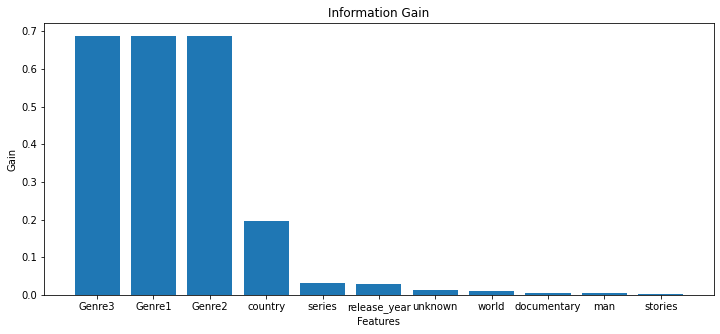

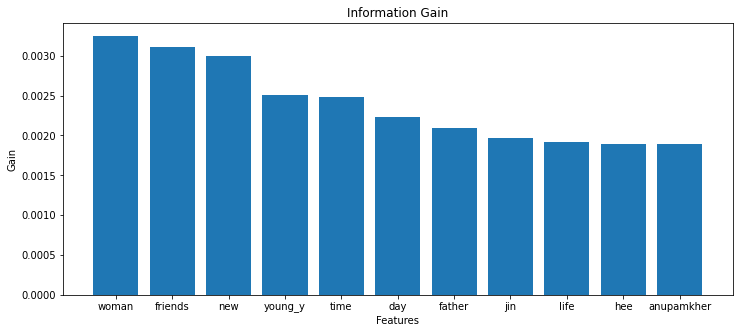

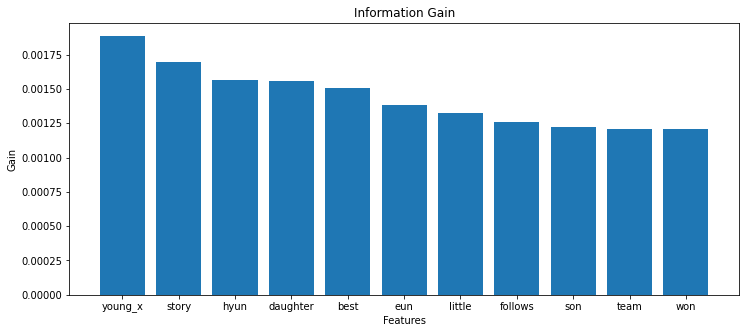

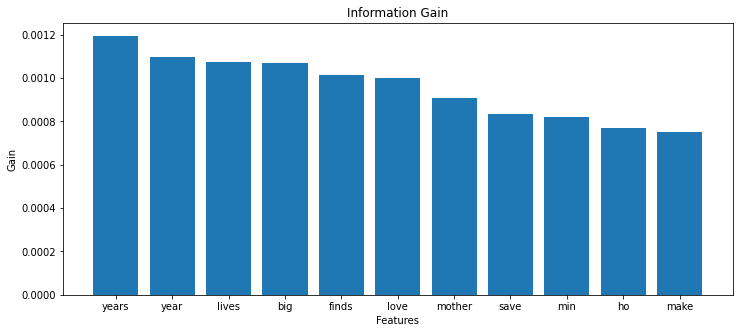

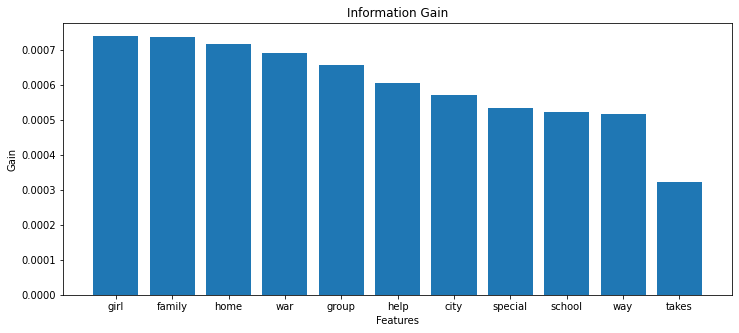

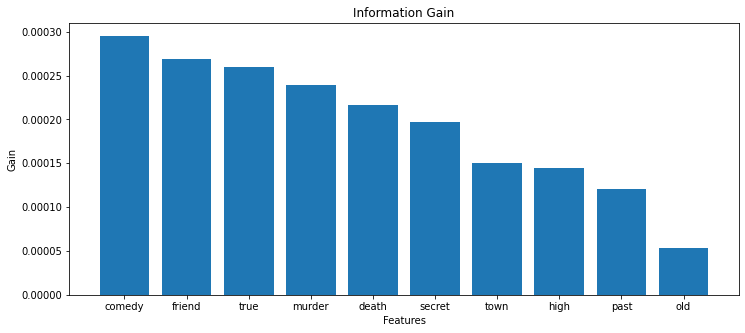

In [24]:
import matplotlib.pyplot as plt


for i in range(1, 7):
    plt.figure(figsize=(12, 5)) 
    plt.bar(list(gain_per_column.keys())[11*(i-1):11*i], list(gain_per_column.values())[11*(i-1):11*i])
    plt.xlabel('Features')
    plt.ylabel('Gain')
    plt.title('Information Gain') 

    plt.show()




# Phase 2 - Predict the target using decision tree

Now, we want to create the decision tree and predict the type. So we should split out data into train and test data. We considered 80% of the data as the train data and 20% for the test.

### Split train and test data

In [25]:
from sklearn.model_selection import train_test_split

X = pp_df.drop(columns=['type'])
y = pp_df['type']
x_train, x_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.2, shuffle=True, random_state=1)  


### Predict type using DecisionTree and GridSearchCV

We need to find **max_depth** and **min_samples_split** hyperparameters to achieve an optimal model. So we used **GridSearchCV**. the **GridSearchCV** class can test the model with different hyperparameters over and over and return the best hyperparameters based on the given scoring. In this project, we considered accuracy as the scoring criterion. You can see the best hyperparameters, best score(accuracy), and confusion matrix.

**Confusion Matrix**  is a specific table layout that allows visualization of the performance of an algorithm. Each row of the matrix represents the instances in an actual class and each column represents the instances in a predicted class.

In [26]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


MAX_DEPTH = 20

def predict_with_decision_tree(x_train, x_test, y_train, y_test):
    gs = GridSearchCV(
        estimator=DecisionTreeClassifier(),
        param_grid={'max_depth': list(range(1, MAX_DEPTH+1, 2)),
                   'min_samples_split': list(range(50, 200, 50))},
        scoring='accuracy'
    )
    gs_result = gs.fit(x_train, y_train)
    predicts = gs.predict(x_test)
    print('Best Params:', gs_result.best_params_)
    print('Best Score (Accuracy):', gs_result.best_score_)

#     print(accuracy_score(y_test, predicts))
    print('------------------------------------------')
    print('Confusion Matrix')
    print(confusion_matrix(y_test, predicts))
    print('-------------------------------------------')
    print(classification_report(y_test, predicts))
    
    
predict_with_decision_tree(x_train, x_test, y_train, y_test)
# decisionTree = self.decisionTree.fit(self.X_train, self.y_train)
# trainPred = self.decisionTree.predict(self.X_train)
# testPred = self.decisionTree.predict(self.X_test)

Best Params: {'max_depth': 9, 'min_samples_split': 50}
Best Score (Accuracy): 0.9967227167188841
------------------------------------------
Confusion Matrix
[[1206    0]
 [   4 1002]]
-------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1206
           1       1.00      1.00      1.00      1006

    accuracy                           1.00      2212
   macro avg       1.00      1.00      1.00      2212
weighted avg       1.00      1.00      1.00      2212



## Question 1 - Use 98% for the train data

In this section, we're going to use 98% of data as the train data and 2% for the test. You can see the results.

In [27]:
x_train_98, x_test_2, y_train_98, y_test_2 = \
    train_test_split(X, y, test_size=0.02, shuffle=True, random_state=1)
predict_with_decision_tree(x_train_98, x_test_2, y_train_98, y_test_2)

Best Params: {'max_depth': 11, 'min_samples_split': 50}
Best Score (Accuracy): 0.9969549958536043
------------------------------------------
Confusion Matrix
[[123   0]
 [  0  99]]
-------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       123
           1       1.00      1.00      1.00        99

    accuracy                           1.00       222
   macro avg       1.00      1.00      1.00       222
weighted avg       1.00      1.00      1.00       222



## Question 1 - Use 40% for the train data

In this section, we're going to use 40% of data as the train data and 60% for the test. You can see the results.

In [28]:
x_train40, x_test60, y_train40, y_test60 = \
    train_test_split(X, y, test_size=0.6, shuffle=True, random_state=1)
predict_with_decision_tree(x_train40, x_test60, y_train40, y_test60)

Best Params: {'max_depth': 15, 'min_samples_split': 50}
Best Score (Accuracy): 0.9945737147531764
------------------------------------------
Confusion Matrix
[[3670    6]
 [   9 2951]]
-------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3676
           1       1.00      1.00      1.00      2960

    accuracy                           1.00      6636
   macro avg       1.00      1.00      1.00      6636
weighted avg       1.00      1.00      1.00      6636



As you saw, the score will not change too much and this is probably because of the genres columns. But confusion matrix has changed.

## Question 2

In [29]:
from matplotlib.pyplot import figure

We created a chart for each data splitting. The X-axis shows the **max_depth** and the Y-axis shows the accuracy. The red chart is representing the prediction in which 98% of samples belong to the train. The blue chart is representing the prediction in which 80% of samples belong to the train. The green chart is representing the prediction in which 40% of samples belong to the train.

As you can see, if the **max_depth** is too low, the accuracy is lower too. If we increase the **max_depth**, the accuracy will be increased until a threshold and after that, increasing **max_depth** is not useful and will not affect the result.

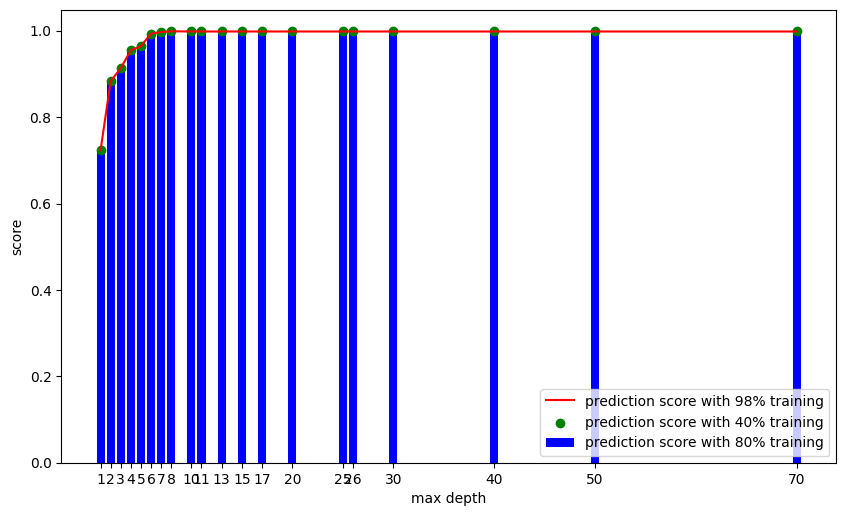

In [30]:
def predict_type_with_decision_tree(max_depth, x_train, x_test, y_train, y_test):
    clf = DecisionTreeClassifier(max_depth=max_depth)
    clf = clf.fit(x_train, y_train)
    predicts = clf.predict(x_test)
    return accuracy_score(y_test, predicts)


max_depth_list = [1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 13, 15, 17, 20, 25, 26, 30, 40, 50, 70]
predict_scores = []
predict_scores_98 = []
predict_scores_40 = []

for i in max_depth_list:
    predict_scores.append(predict_type_with_decision_tree(i, x_train, x_test, y_train, y_test))
    predict_scores_98.append(predict_type_with_decision_tree(i, x_train_98, x_test_2, y_train_98, y_test_2))
    predict_scores_40.append(predict_type_with_decision_tree(i, x_train40, x_test60, y_train40, y_test60))



fig = plt.figure(figsize=(10,6), dpi=100)

plt.bar(max_depth_list, predict_scores, color='blue', label='prediction score with 80% training')
plt.plot(max_depth_list, predict_scores, color='red', label='prediction score with 98% training')
plt.scatter(max_depth_list, predict_scores, color='green', label='prediction score with 40% training')



plt.xticks(max_depth_list)
plt.xlabel('max depth')
plt.ylabel('score')
plt.legend(loc='best')

# Phase 3 - Random Forrest

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=42)
rfc.fit(x_train, y_train)
predicts = rfc.predict(x_test)
print(accuracy_score(y_test, predicts))
print(classification_report(y_test, predicts))

0.9679023508137432
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1206
           1       1.00      0.93      0.96      1006

    accuracy                           0.97      2212
   macro avg       0.97      0.96      0.97      2212
weighted avg       0.97      0.97      0.97      2212



### Predict with different hyperparameters

In [33]:
def predict_type_with_rfc(depth = 6, max_leaf_nodes = 10):
    rfc = RandomForestClassifier(max_leaf_nodes=max_leaf_nodes, max_depth=depth, random_state=42)
    rfc.fit(x_train, y_train)
    predicts = rfc.predict(x_test)
    return accuracy_score(y_test, predicts)

### Predict with different max_depth

In the following section, we test max_depth values between 1 and 40. The results are similiar to decision tree. After while, with increasing the **max_depth**, the accuracy will not increase. And it's becuse of genre columns.

max_predict_accuracy:  0.9629294755877035
max_predict_accuracy_depth:  8


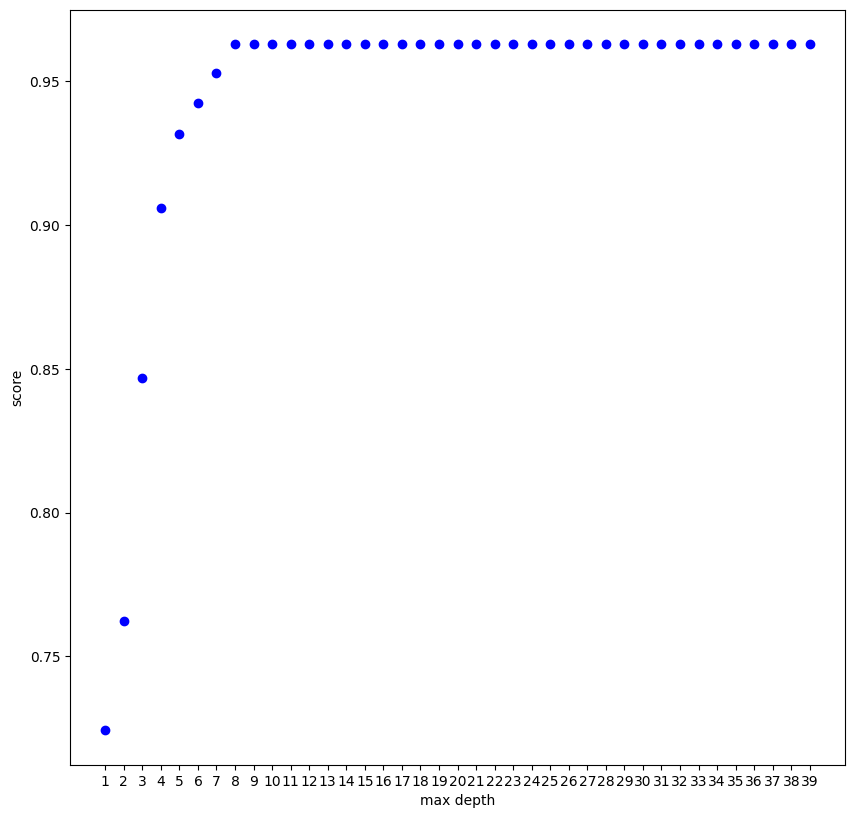

In [34]:
max_depth_list = range(1, 40)
predict_scores = []
max_predict = 0
max_predict_depth = 0

for i in max_depth_list:
    predict_accuracy = predict_type_with_rfc(depth=i)
    if predict_accuracy > max_predict:
        max_predict = predict_accuracy
        max_predict_depth = i
    predict_scores.append(predict_accuracy)

print('max_predict_accuracy: ', max_predict)
print('max_predict_accuracy_depth: ', max_predict_depth)

fig = plt.figure(figsize=(10,10), dpi=100)
plt.xticks(max_depth_list)
plt.xlabel('max depth')
plt.ylabel('score')
plt.scatter(max_depth_list, predict_scores, color='blue', label='prediction with different max_depth')

### Predict with different max_leaf_nodes

In the following section, we test **max_leaf_nodes** values between 5 and 150. **max_leaf_nodes** grows trees with **max_leaf_nodes** value in best-first fashion. If None, then unlimited number of leaf nodes.. The results are similiar to decision tree. After while, with increasing the **max_leaf_nodes**, the accuracy will not increased. And it's because of genre columns.

max_predict_accuracy:  0.9543399638336347
max_predict_accuracy_depth:  30


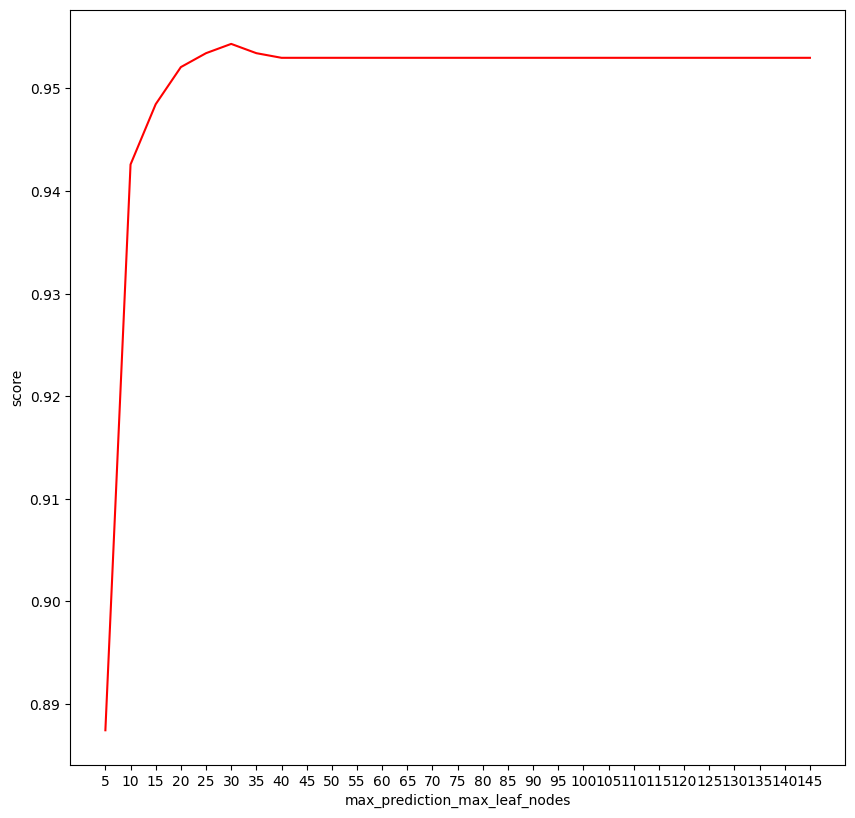

In [35]:
max_leaf_nodes_list = list(range(5, 150, 5))
predict_scores = []
max_predict = 0
max_prediction_max_leaf_nodes = 0

for i in max_leaf_nodes_list:
    predict_accuracy = predict_type_with_rfc(max_leaf_nodes=i)
    if predict_accuracy > max_predict:
        max_predict = predict_accuracy
        max_prediction_max_leaf_nodes = i
    predict_scores.append(predict_accuracy)

print('max_predict_accuracy: ', max_predict)
print('max_predict_accuracy_depth: ', max_prediction_max_leaf_nodes)

fig = plt.figure(figsize=(10,10), dpi=100)
plt.xticks(max_leaf_nodes_list)
plt.xlabel('max_prediction_max_leaf_nodes')
plt.ylabel('score')
plt.plot(max_leaf_nodes_list, predict_scores, color='red', label='prediction with different n_estimator')

The results is same to decisino tree.

### Variance & Bias

**Bias** is the difference between the average prediction of our model and the correct value which we are trying to predict. Model with high bias pays very little attention to the training data and oversimplifies the model. It always leads to high error on training and test data. We say our model is biased if it systematically under or over predicts the target variable. 


**Variance** is the variability of model prediction for a given data point or a value which tells us spread of our data. Model with high variance pays a lot of attention to training data and does not generalize on the data which it hasn’t seen before. As a result, such models perform very well on training data but has high error rates on test data.



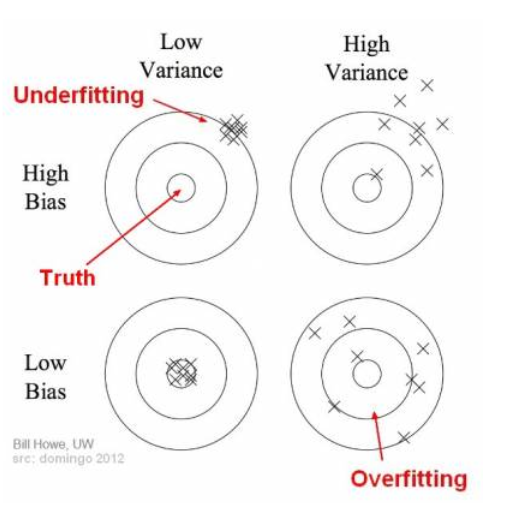

In [36]:
from IPython.display import Image
Image("img/variance.png")

Decision Tree have less bias, because it uses several trees.